#  Applied Machine Learing: Simple Weather Classification

## Import required modules and load data file

In [1]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Leoyen-1998',
    db='weather',
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM weather_6hr")

myresult = mycursor.fetchall()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

weather = pd.DataFrame(list(myresult),
               columns =['date', 'city', 'weather_type', 'highest_temperature', 'lowest_temperature', 'chance_of_rain'])

weather.head()

,date,city,weather_type,highest_temperature,lowest_temperature,chance_of_rain
0,2023-07-11 12:00:00,南投縣,多雲午後短暫雷陣雨,34,30,0.6
1,2023-07-11 12:00:00,嘉義市,多雲午後短暫雷陣雨,34,30,0.7
2,2023-07-11 12:00:00,嘉義縣,多雲午後短暫雷陣雨,34,31,0.5
3,2023-07-11 12:00:00,基隆市,多雲,33,30,0.2
4,2023-07-11 12:00:00,宜蘭縣,晴時多雲,33,30,0.1


## Ad hoc label data

In [3]:
weather_type = weather.weather_type.unique()
weather_type

array(['多雲午後短暫雷陣雨', '多雲', '晴時多雲', '晴午後短暫雷陣雨', '多雲時晴', '多雲短暫陣雨',
       '多雲午後短暫陣雨', '陰時多雲短暫陣雨', '陰時多雲', '陰天'], dtype=object)

In [4]:
# create a map for ad-hoc
look_weather_type = dict(zip(weather_type, range(1, len(weather_type)+1)))
look_weather_type

{'多雲午後短暫雷陣雨': 1,
 '多雲': 2,
 '晴時多雲': 3,
 '晴午後短暫雷陣雨': 4,
 '多雲時晴': 5,
 '多雲短暫陣雨': 6,
 '多雲午後短暫陣雨': 7,
 '陰時多雲短暫陣雨': 8,
 '陰時多雲': 9,
 '陰天': 10}

In [5]:
# create a new nominal label for classification
weather['weather_label'] = weather.weather_type.apply(lambda x: look_weather_type[x])

# reorder columns for better visualization
weather = weather[['date', 'city', 'weather_type', 'weather_label', 'highest_temperature', 'lowest_temperature', 'chance_of_rain']]

In [6]:
weather.head()

,date,city,weather_type,weather_label,highest_temperature,lowest_temperature,chance_of_rain
0,2023-07-11 12:00:00,南投縣,多雲午後短暫雷陣雨,1,34,30,0.6
1,2023-07-11 12:00:00,嘉義市,多雲午後短暫雷陣雨,1,34,30,0.7
2,2023-07-11 12:00:00,嘉義縣,多雲午後短暫雷陣雨,1,34,31,0.5
3,2023-07-11 12:00:00,基隆市,多雲,2,33,30,0.2
4,2023-07-11 12:00:00,宜蘭縣,晴時多雲,3,33,30,0.1


## Examing the data

In [7]:
X = weather[['highest_temperature', 'lowest_temperature', 'chance_of_rain']]
y = weather['weather_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=0)

<IPython.core.display.Javascript object>


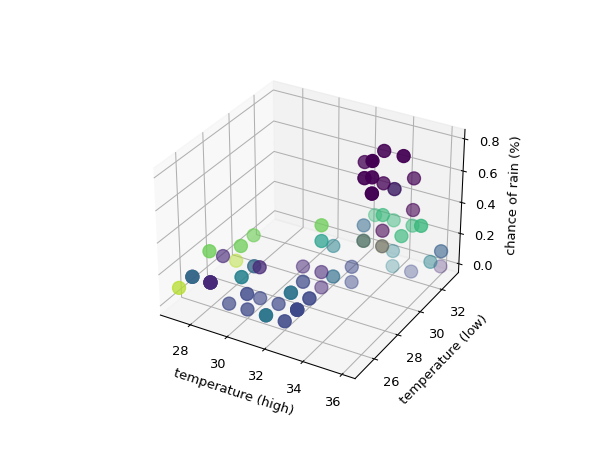

In [8]:
# plotting a 3D scatter plot
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['highest_temperature'], X_train['lowest_temperature'], X_train['chance_of_rain'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('temperature (high)')
ax.set_ylabel('temperature (low)')
ax.set_zlabel('chance of rain (%)')
plt.show()

## Create train-test split

In [9]:
X = weather[['highest_temperature', 'lowest_temperature', 'chance_of_rain']]
y = weather['weather_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=0)

## Train the classifier (fit the estimator) using the training data

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# create classifier object
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

## Estimate the accuracy of the classifier on future data, using the test data

In [11]:
knn.score(X_test, y_test)

0.5

## Use the trained k-NN classifier model to classify new, previously unseen objects

### First example: a day with highest temperature of 34°C, lowest temperature of 28°C and a chance of rain 35%

In [12]:
weather_prediction = knn.predict([[34, 28, 0.35]])
weather_prediction

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [13]:
look_weather_dict = dict(zip(range(1, len(weather_type)+1), weather_type))
look_weather_dict

{1: '多雲午後短暫雷陣雨',
 2: '多雲',
 3: '晴時多雲',
 4: '晴午後短暫雷陣雨',
 5: '多雲時晴',
 6: '多雲短暫陣雨',
 7: '多雲午後短暫陣雨',
 8: '陰時多雲短暫陣雨',
 9: '陰時多雲',
 10: '陰天'}

In [14]:
look_weather_dict[weather_prediction[0]]

'多雲午後短暫雷陣雨'

### Second example: a day with highest temperature of 28C, lowest temperature of 23°C and a chance of rain 10%

In [15]:
weather_prediction = knn.predict([[28, 23, 0.10]])
weather_prediction

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [16]:
look_weather_dict[weather_prediction[0]]

'多雲'

## Plot the decision boundaries of the k-NN classifier

In [17]:
def plot_weather_knn(X, y, n_neighbors, weights):
    
    from matplotlib.colors import ListedColormap, BoundaryNorm
    import matplotlib.patches as mpatches
    
    from sklearn import neighbors
    
    X_mat = X[['highest_temperature', 'lowest_temperature']].values
    y_mat = y.values

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF', '#AAAFAA', '#FAFAFA', '#FFFAAA', '#FFAFAA', '#AFFAFF', '#AFFAFA'])
    cmap_bold  = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF', '#AAAFAA', '#FAFAFA', '#FFFAAA', '#FFAFAA', '#AFFAFF', '#AFFAFA'])

    #'#FF0000', '#00FF00', '#0000FF','#AFAFAF', '#000F00', '#F0F0F0', '#FFF000', '#FF0FF0', '#0FF0FF', '#0FF0F0'
    
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FFAAAA', label='Partly cloudy, rainy afternoon')
    patch1 = mpatches.Patch(color='#AAFFAA', label='Partly cloudy')
    patch2 = mpatches.Patch(color='#AAAAFF', label='Suuny, ocationally shower')
    patch3 = mpatches.Patch(color='#AFAFAF', label='Suuny, rainy afternoon')
    patch4 = mpatches.Patch(color='#AAAFAA', label='Partly cloudy, ocationally sunny')
    patch5 = mpatches.Patch(color='#FAFAFA', label='Partly cloudy. teperarly shower')
    patch6 = mpatches.Patch(color='#FFFAAA', label='partly cloudy, teperarly shower afternoon')
    patch7 = mpatches.Patch(color='#FFAFFA', label='Cloudy,temperay shower')
    patch8 = mpatches.Patch(color='#AFFAFF', label='Cloudy')
    patch9 = mpatches.Patch(color='#AFFAFA', label='Heavy cloud')
    plt.legend(handles=[patch0, patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9])

        
    plt.xlabel('temperature (high)')
    plt.ylabel('tmperature (low)')
    
    plt.show()


<IPython.core.display.Javascript object>


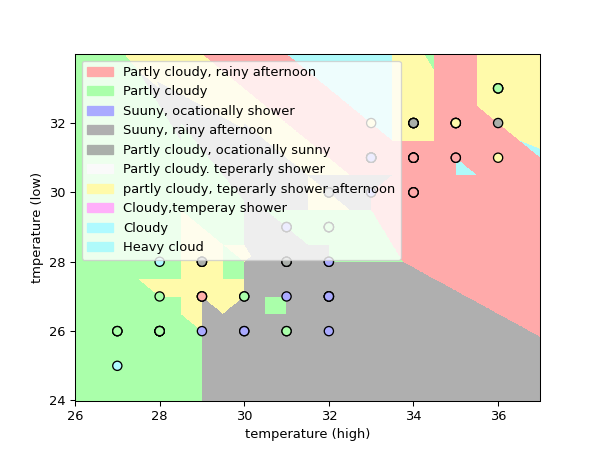

In [18]:
plot_weather_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

## Visualize sensitive of k-NN classification accuracy to the choice of the 'k' parameter

<IPython.core.display.Javascript object>


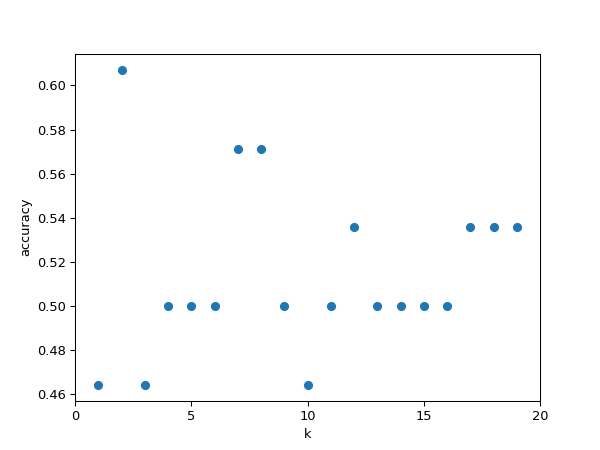

In [19]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

From what we observe, larger value of K neighbor seems to have lower accuracy. In conclusion, there's a trade of between the two.